In [ ]:
*-import pandas as pd-

In [ ]:
-data = pd.read_csv('/content/bootcamp.csv')

In [ ]:
data.isnull().sum()

Age            0
SystolicBP     0
DiastolicBP    0
BS             0
BodyTemp       0
HeartRate      0
RiskLevel      0
dtype: int64

In [ ]:
data_dup = data.duplicated().any()

In [ ]:
data_dup


True

In [ ]:
data = data.drop_duplicates()

In [ ]:
data_dup = data.duplicated().any()

In [ ]:
data_dup

False

In [ ]:
cate_val = []
cont_val = []
for column in data.columns:
    if data[column].nunique() <=10:
        cate_val.append(column)
    else:
        cont_val.append(column)

In [ ]:
cate_val

['BodyTemp', 'RiskLevel']

In [ ]:
cont_val

['Age', 'SystolicBP', 'DiastolicBP', 'BS', 'HeartRate']

In [ ]:
cate_val

['BodyTemp', 'RiskLevel']

In [ ]:
data['RiskLevel'].unique()

array([1, 0])

In [ ]:
cate_val.remove('RiskLevel')
data = pd.get_dummies(data,columns = cate_val,drop_first=True)

In [ ]:
data.head()

,Age,SystolicBP,DiastolicBP,BS,HeartRate,RiskLevel,BodyTemp_98.4,BodyTemp_98.6,BodyTemp_99.0,BodyTemp_100.0,BodyTemp_101.0,BodyTemp_102.0,BodyTemp_103.0
0,25,130,80,15.0,86,1,0,0,0,0,0,0,0
1,35,140,90,13.0,70,1,0,0,0,0,0,0,0
2,29,90,70,8.0,80,1,0,0,0,1,0,0,0
3,30,140,85,7.0,70,1,0,0,0,0,0,0,0
4,35,120,60,6.1,76,0,0,0,0,0,0,0,0


In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
st = StandardScaler()
data[cont_val] = st.fit_transform(data[cont_val])

In [ ]:
data.head()

,Age,SystolicBP,DiastolicBP,BS,HeartRate,RiskLevel,BodyTemp_98.4,BodyTemp_98.6,BodyTemp_99.0,BodyTemp_100.0,BodyTemp_101.0,BodyTemp_102.0,BodyTemp_103.0
0,-0.320591,1.069277,0.327959,2.282432,1.465008,1,0,0,0,0,0,0,0
1,0.402178,1.622374,1.051297,1.589909,-0.483393,1,0,0,0,0,0,0,0
2,-0.031484,-1.143110,-0.395380,-0.141400,0.734358,1,0,0,0,1,0,0,0
3,0.040793,1.622374,0.689628,-0.487661,-0.483393,1,0,0,0,0,0,0,0
4,0.402178,0.516180,-1.118718,-0.799297,0.247258,0,0,0,0,0,0,0,0


In [ ]:
X = data.drop('RiskLevel',axis=1)

In [ ]:
y = data['RiskLevel']

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,
                                               random_state=42)

In [ ]:
y_test

670    0
77     0
254    0
30     0
545    0
      ..
577    0
57     0
136    1
24     0
17     1
Name: RiskLevel, Length: 86, dtype: int64

In [ ]:
data.head()

,Age,SystolicBP,DiastolicBP,BS,HeartRate,RiskLevel,BodyTemp_98.4,BodyTemp_98.6,BodyTemp_99.0,BodyTemp_100.0,BodyTemp_101.0,BodyTemp_102.0,BodyTemp_103.0
0,-0.320591,1.069277,0.327959,2.282432,1.465008,1,0,0,0,0,0,0,0
1,0.402178,1.622374,1.051297,1.589909,-0.483393,1,0,0,0,0,0,0,0
2,-0.031484,-1.143110,-0.395380,-0.141400,0.734358,1,0,0,0,1,0,0,0
3,0.040793,1.622374,0.689628,-0.487661,-0.483393,1,0,0,0,0,0,0,0
4,0.402178,0.516180,-1.118718,-0.799297,0.247258,0,0,0,0,0,0,0,0


In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
log = LogisticRegression()
log.fit(X_train,y_train)

LogisticRegression()

In [ ]:
y_pred1 = log.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
accuracy_score(y_test,y_pred1)

0.8837209302325582

In [ ]:
from sklearn import svm

In [ ]:
svm = svm.SVC()

In [ ]:
svm.fit(X_train,y_train)

SVC()

In [ ]:
y_pred2 = svm.predict(X_test)

In [ ]:
accuracy_score(y_test,y_pred2)

0.9302325581395349

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn = KNeighborsClassifier()

In [ ]:
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [ ]:
y_pred3=knn.predict(X_test)

In [ ]:
accuracy_score(y_test,y_pred3)

0.9186046511627907

In [ ]:
score = []

for k in range(1,40):
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    y_pred=knn.predict(X_test)
    score.append(accuracy_score(y_test,y_pred))

In [ ]:
score

[0.8488372093023255,
 0.8953488372093024,
 0.9186046511627907,
 0.9069767441860465,
 0.9186046511627907,
 0.9186046511627907,
 0.9186046511627907,
 0.9186046511627907,
 0.9186046511627907,
 0.9302325581395349,
 0.9302325581395349,
 0.9302325581395349,
 0.9302325581395349,
 0.9302325581395349,
 0.9302325581395349,
 0.9186046511627907,
 0.9302325581395349,
 0.9302325581395349,
 0.9302325581395349,
 0.9186046511627907,
 0.9186046511627907,
 0.9186046511627907,
 0.9186046511627907,
 0.9069767441860465,
 0.9186046511627907,
 0.9186046511627907,
 0.9302325581395349,
 0.9069767441860465,
 0.9069767441860465,
 0.9069767441860465,
 0.9069767441860465,
 0.8953488372093024,
 0.8953488372093024,
 0.8953488372093024,
 0.8837209302325582,
 0.8837209302325582,
 0.8953488372093024,
 0.8953488372093024,
 0.8953488372093024]

In [ ]:
knn=KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train,y_train)
y_pred=knn.predict(X_test)
accuracy_score(y_test,y_pred)

0.8953488372093024

In [ ]:
data = pd.read_csv('/content/bootcamp.csv')

In [ ]:
data = data.drop_duplicates()

In [ ]:
X = data.drop('RiskLevel',axis=1)
y=data['RiskLevel']

In [ ]:
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2,
                                                random_state=42)

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
dt = DecisionTreeClassifier()

In [ ]:
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [ ]:
y_pred4= dt.predict(X_test)

In [ ]:
accuracy_score(y_test,y_pred4)

0.7906976744186046

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
y_pred5= rf.predict(X_test)
accuracy_score(y_test,y_pred5)

0.8837209302325582

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier()
gbc.fit(X_train,y_train)
y_pred6 = gbc.predict(X_test)
accuracy_score(y_test,y_pred6)

0.872093023255814

In [ ]:
final_data = pd.DataFrame({'Models':['LR','SVM','KNN','DT','RF','GB'],
                          'ACC':[accuracy_score(y_test,y_pred1)*100,
                                accuracy_score(y_test,y_pred2)*100,
                                accuracy_score(y_test,y_pred3)*100,
                                accuracy_score(y_test,y_pred4)*100,
                                accuracy_score(y_test,y_pred5)*100,
                                accuracy_score(y_test,y_pred6)*100]})

In [ ]:
final_data

,Models,ACC
0,LR,88.372093
1,SVM,93.023256
2,KNN,91.860465
3,DT,79.069767
4,RF,88.372093
5,GB,87.209302


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


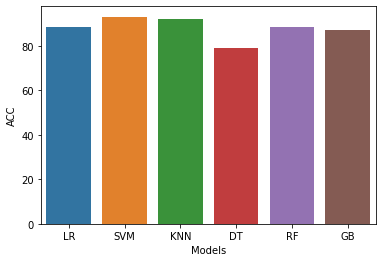

In [ ]:
import seaborn as sns
sns.barplot(final_data['Models'],final_data['ACC'])

In [ ]:
X=data.drop('RiskLevel',axis=1)
y=data['RiskLevel']

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X,y)

RandomForestClassifier()

In [ ]:
import pandas as pd

In [ ]:
new_data = pd.DataFrame({
    'Age':52,
    'SystolicBP':120,
    'DiastolicBP':80,
    'BS':9,
    'BodyTemp':98,
    'HeartRate':75,   
},index=[0])

In [ ]:
new_data

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate
0,52,120,80,9,98,75


In [ ]:
p = rf.predict(new_data)
if p[0]==0:
    print("The pregnant patient is at low risk")
else:
    print("The pregnant patient is at high risk")

The pregnant patient is at low risk
